In [1]:
# PCA for individuals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Get our latest dataframe

df_all_images = pd.read_csv("createdCSV/AgeDB_Sim_Feat_Result.csv")
df_all_images

,Unnamed: 0.1,Unnamed: 0,ID,Name,Gender,Model,First Image,First Age,First Age Range,First Image Features,Second Image,Second Age,Second Age Range,Second Image Features,Cosine Similarity
0,37,37,4,HelenHunt,0,buffalo_l,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,10046_HelenHunt_34_f.jpg,34,31-40,[-2.37687211e-02 -3.99875361e-03 5.16198725e-...,0.675845
1,38,38,4,HelenHunt,0,buffalo_l,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,10051_HelenHunt_37_f.jpg,37,31-40,[-4.79663238e-02 1.64809525e-02 -4.03776951e-...,0.707469
2,39,39,4,HelenHunt,0,buffalo_l,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,10050_HelenHunt_37_f.jpg,37,31-40,[-5.50042726e-02 3.68939005e-02 2.77201869e-...,0.585313
3,40,40,4,HelenHunt,0,buffalo_l,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,10049_HelenHunt_36_f.jpg,36,31-40,[-0.03986527 0.01015108 0.07416099 0.009403...,0.754621
4,41,41,4,HelenHunt,0,buffalo_l,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,10048_HelenHunt_35_f.jpg,35,31-40,[-3.83438580e-02 -4.08570794e-03 4.98428904e-...,0.718126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86447,176520,176520,566,ElkeSommer,0,buffalo_l,9970_ElkeSommer_61_f.jpg,61,61-70,[ 3.34328152e-02 -9.95962918e-02 -1.84935257e-...,9962_ElkeSommer_44_f.jpg,44,41-50,[ 3.94389257e-02 -6.26973733e-02 -4.01959047e-...,0.615266
86448,176521,176521,566,ElkeSommer,0,buffalo_l,9971_ElkeSommer_62_f.jpg,62,61-70,[ 1.75836030e-02 -8.81809667e-02 -2.66958829e-...,9972_ElkeSommer_63_f.jpg,63,61-70,[ 7.69860968e-02 -8.08814913e-02 -4.46359515e-...,0.869986
86449,176522,176522,566,ElkeSommer,0,buffalo_l,9971_ElkeSommer_62_f.jpg,62,61-70,[ 1.75836030e-02 -8.81809667e-02 -2.66958829e-...,9973_ElkeSommer_64_f.jpg,64,61-70,[ 7.81833008e-03 -7.26524964e-02 -5.03539816e-...,0.727862
86450,176523,176523,566,ElkeSommer,0,buffalo_l,9971_ElkeSommer_62_f.jpg,62,61-70,[ 1.75836030e-02 -8.81809667e-02 -2.66958829e-...,9975_ElkeSommer_67_f.jpg,67,61-70,[ 2.64054723e-02 -5.44106103e-02 -2.20713485e-...,0.754011


In [3]:
# Function that produce a PCA plot for a ID person

def pca_individual_plot(df_im, id):
    df_individual = df_im.loc[df_im["ID"] == id]

    list_of_individual_images = np.unique(df_individual["First Image"].to_list())

    column_list_individual = ['feat' + str(i) for i in range(512)] + ['target (age range)']
    df_features_individual = pd.DataFrame(columns=column_list_individual)

    for filename in list_of_individual_images:
        feature_vector = df_individual.loc[df_individual["First Image"] == filename, "First Image Features"].values[0]
        age_range = df_individual.loc[df_individual["First Image"] == filename, "First Age Range"].values[0]
        feature_vector = feature_vector[1:-1].split(" ")
        feat = []
        for i in feature_vector:
            if len(i) != 0:
                i = i.replace("\n", "")
                feat.append(float(i))
        feat.append(age_range)
        df_features_individual.loc[len(df_features_individual)] = feat

    features_list_individual = column_list_individual[:-1]

    # Separating out the features
    X_individual = df_features_individual.loc[:, features_list_individual].values

    # Separating out the target
    #Y_individual = df_features_individual.loc[:,['target (age range)']].values

    # Standardizing the features
    X_individual = StandardScaler().fit_transform(X_individual)

    pca_individual = PCA(n_components = 2)

    principalComponents_individual = pca_individual.fit_transform(X_individual)

    df_principal_individual = pd.DataFrame(data = principalComponents_individual
                , columns = ['Principal Component 1', 'Principal Component 2'])

    df_pca_result_individual = pd.concat([df_principal_individual, df_features_individual[['target (age range)']]], axis = 1)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('First vs Second Component', fontsize = 20)
    targets = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
    colors = ['r', 'b', 'y', 'g', 'm', 'c', 'k', 'dimgray']
    for target, color in zip(targets,colors):
        indicesToKeep = df_pca_result_individual['target (age range)'] == target
        ax.scatter(df_pca_result_individual.loc[indicesToKeep, 'Principal Component 1']
                , df_pca_result_individual.loc[indicesToKeep, 'Principal Component 2']
                , c = color
                , s = 40)
    ax.legend(targets)
    ax.grid()

    return pca_individual.explained_variance_ratio_
        
    

In [4]:
unique_ids = np.unique(df_all_images["ID"].to_list())
unique_ids

array([  4,   5,   6,   7,  14,  16,  18,  19,  20,  27,  28,  30,  32,
        33,  38,  41,  44,  47,  48,  50,  51,  53,  56,  58,  63,  66,
        68,  69,  71,  73,  77,  78,  79,  81,  83,  85,  86,  87,  91,
        95,  97,  98, 101, 103, 107, 108, 110, 114, 116, 117, 118, 119,
       120, 122, 125, 133, 138, 139, 140, 143, 147, 150, 155, 156, 157,
       158, 159, 161, 167, 170, 173, 177, 178, 180, 181, 183, 185, 187,
       188, 190, 191, 193, 194, 195, 199, 201, 202, 204, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 224,
       225, 226, 227, 235, 236, 240, 243, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 268, 269, 270, 272, 273, 274, 275, 277,
       279, 280, 281, 282, 284, 286, 287, 291, 295, 298, 299, 300, 303,
       304, 305, 306, 308, 309, 310, 312, 314, 315, 318, 319, 320, 321,
       322, 324, 328, 329, 332, 335, 338, 340, 341, 342, 343, 345, 347,
       354, 355, 356, 358, 362, 365, 367, 370, 374, 375, 379, 38

array([0.18463845, 0.11222432])

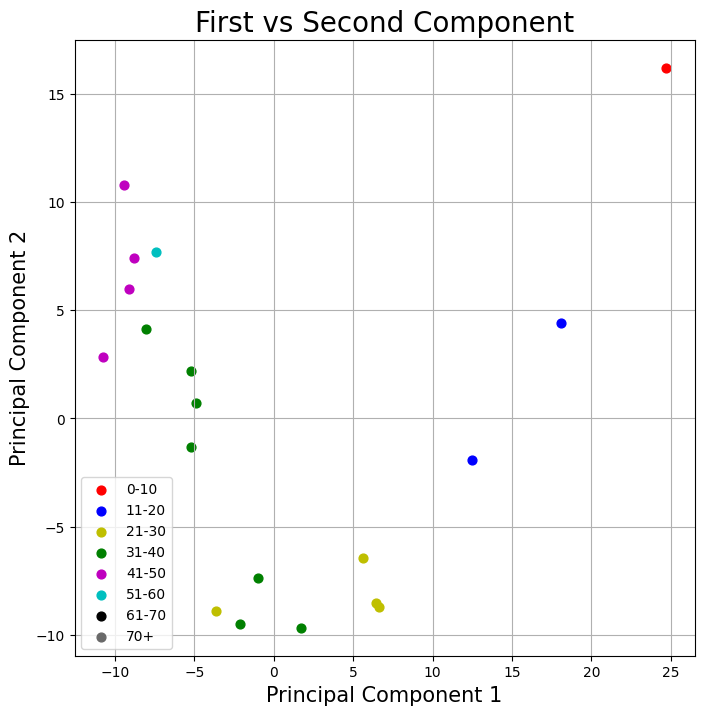

In [5]:
pca_individual_plot(df_all_images, 4)

array([0.14382606, 0.10553616])

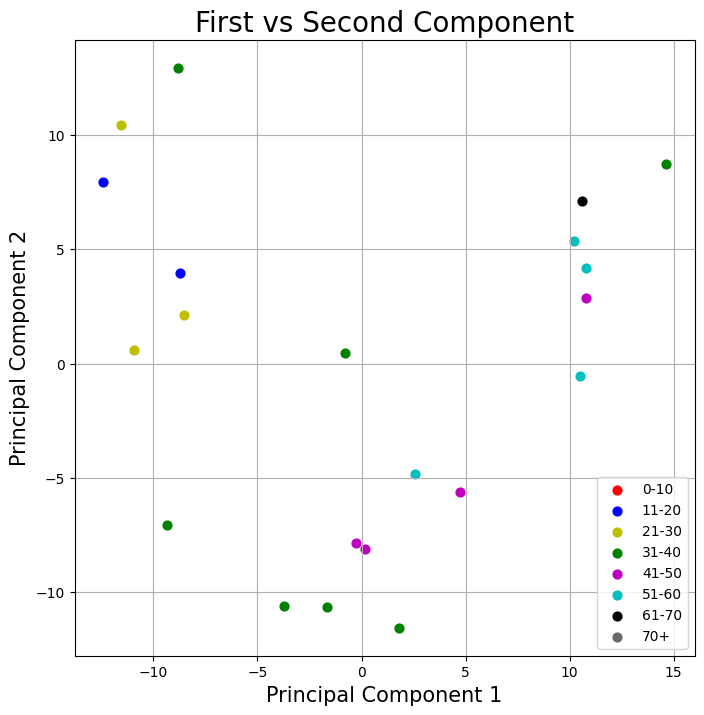

In [6]:
pca_individual_plot(df_all_images, 5)

array([0.21189903, 0.09235089])

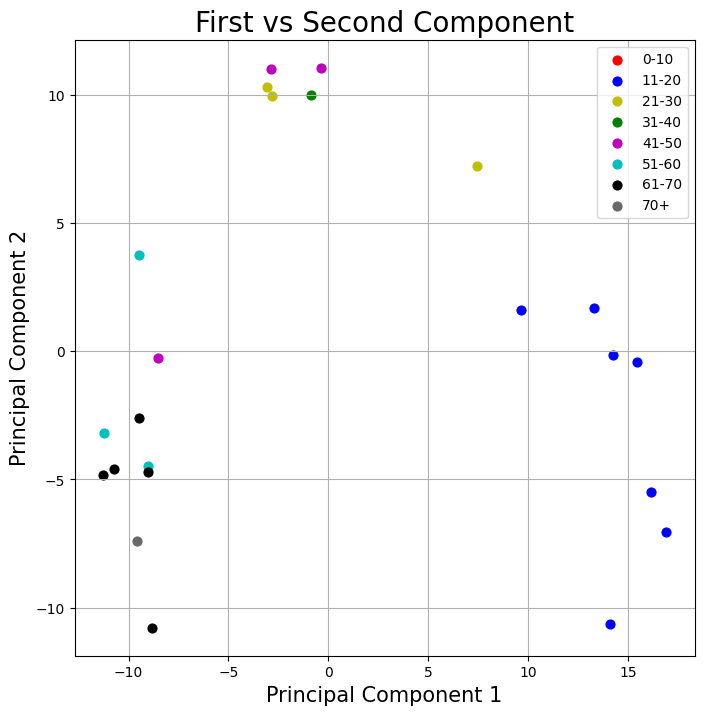

In [7]:
pca_individual_plot(df_all_images, 6)

array([0.3440818 , 0.25230159])

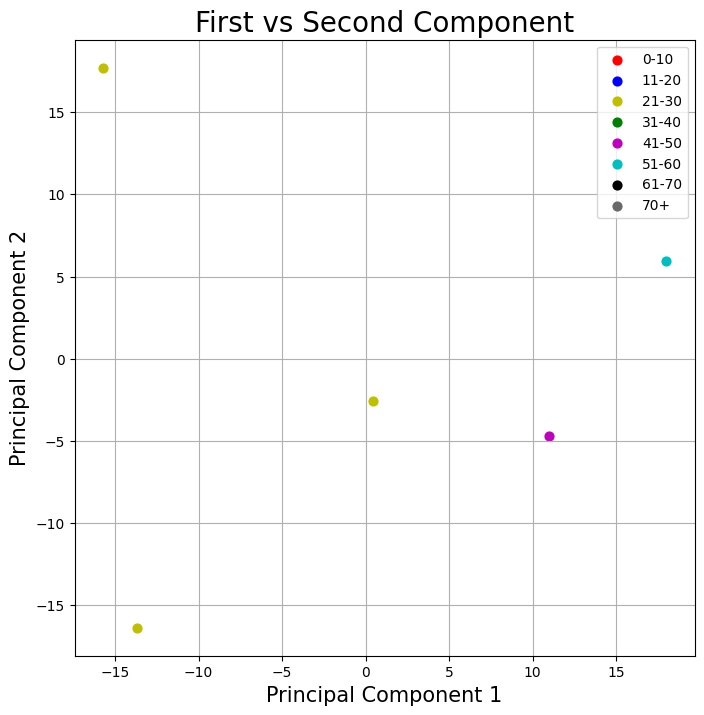

In [8]:
pca_individual_plot(df_all_images, 312)

array([0.15382756, 0.09968077])

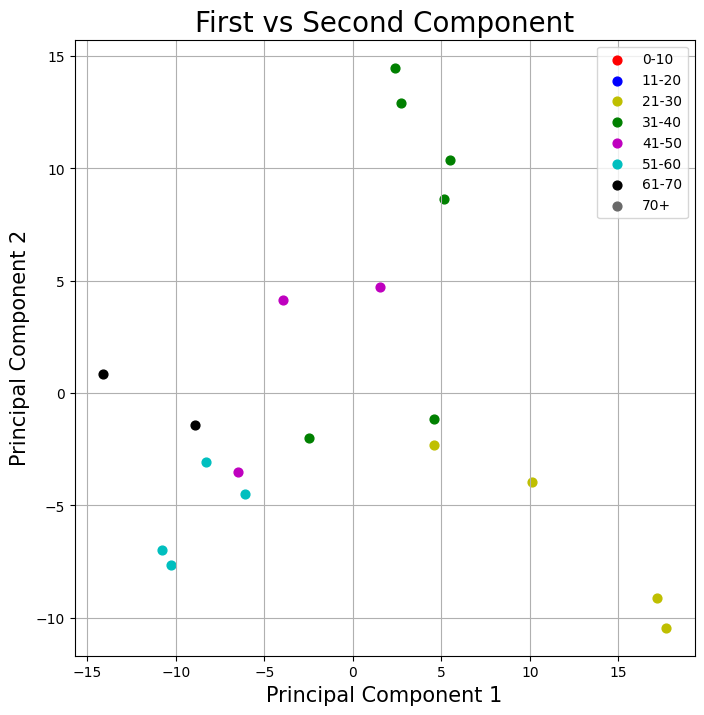

In [9]:
pca_individual_plot(df_all_images, 282)

In [10]:
# t-SNE for one person at the time - better clusters?
# Average plot with men/women and one with both
# Adding std to the average plot
# Calculate variance and std for each average similarity

# If we have time
    # Try on other dataset

# For future research:
    # Differnt ethnicity
    # 